In [37]:
from layout import Layout

## Definition
The (logical) division is defined as $A \oslash B := A \circ (B, \tilde B)$.

In terms of the pseudo code:
```python
compl = other.complement(self.size())
cat = Layout.from_concate(other, compl)
return self.composite(cat)
```

## Regular Division

A.size() = 24


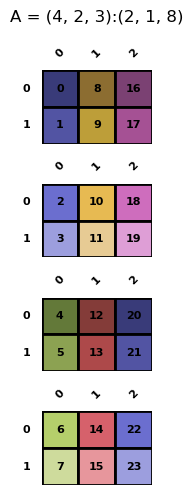

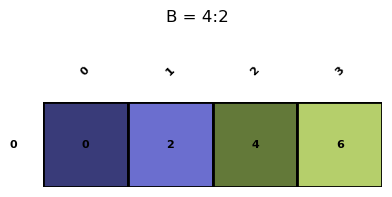

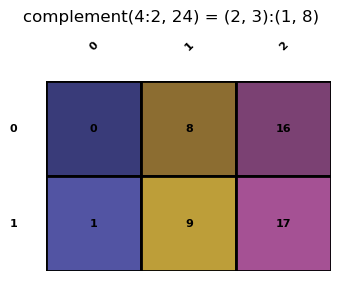

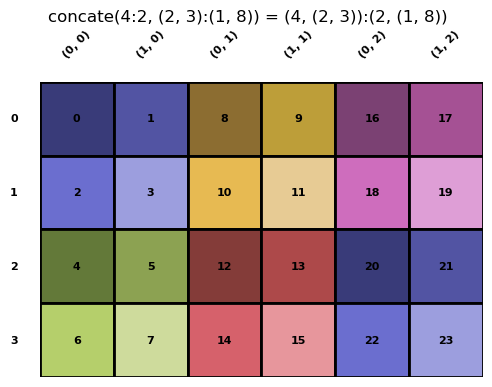

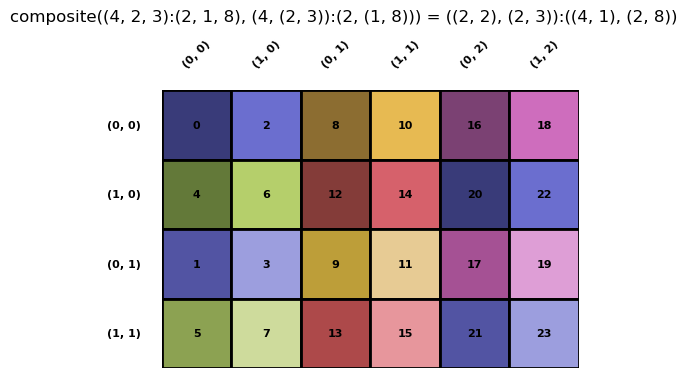

In [43]:
A = Layout.from_string('(4,2,3):(2,1,8)').visualize('A')
print('A.size() =', A.size())
B = Layout.from_string('4:2').visualize('B')
_ = A.logical_divide(B, visualize_steps=True)

If the last step is hard to grasp, we may want to linearize A:

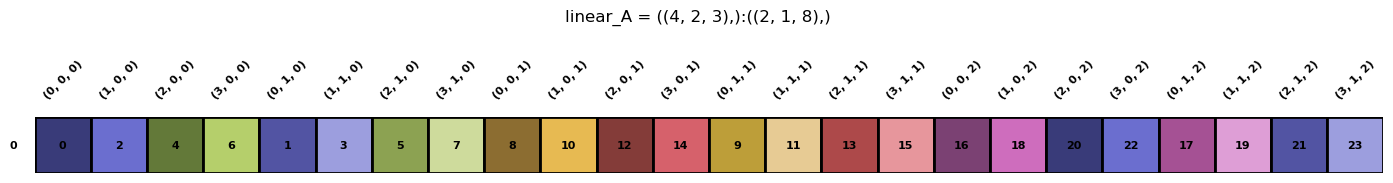

In [39]:
linear_A = Layout.from_string('( (4,2,3), ):( (2,1,8), )').visualize('linear_A')

Now it is clear to see $A \circ B$ is just de-referencing $B, \tilde{B}$ as a pointer of $A$:

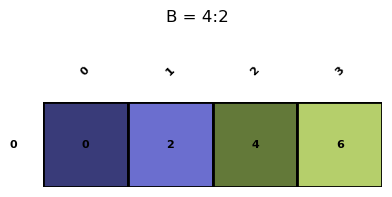

In [45]:
_ = B.visualize("B")

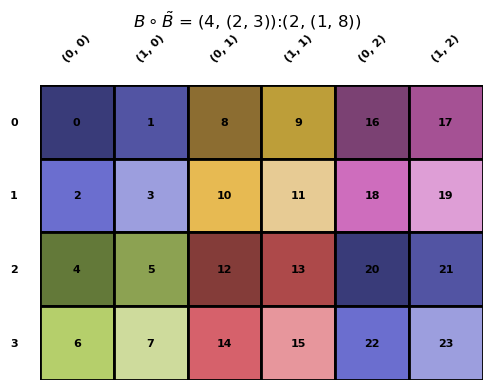

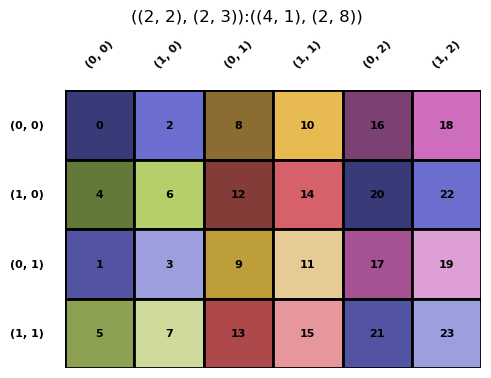

In [48]:
_ = A.composite(Layout.from_string('4,(2,3):2,(1,8)').visualize('$B \\circ \\tilde{B}$')).visualize()

## Yet to be Done

In [41]:
# Layout.from_string('(9,(4,8)):(59,(13,1))').visualize().logical_divide(Layout.from_string('3,(2,4):3,(1,8)'), by_mode=True).visualize()
# Layout.from_string('(9,(4,8)):(59,(13,1))').hierarchical_unzip('logical_divide', Layout.from_string('3,(2,4):3,(1,8)')).visualize()